# How well do jobs and skills pay for Data Analysts?

## Methodology

1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import ast 
import seaborn as sns

#Loading Data
df = pd.read_csv('/Users/robertocortez/Desktop/data_jobs.csv')

# Data Cleanup 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Converting job_skills column from str to list
df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) and pd.notna(skill_list) else skill_list
) 

In [2]:
# Filter for the job titles and country

df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [4]:
# Top 6 job titles in the US
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [6]:
# Creating a dataframe with only the top 6 job titles 
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

df_US_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",NaN,NaN
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [10]:
# Sorting the job titles by median salary
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

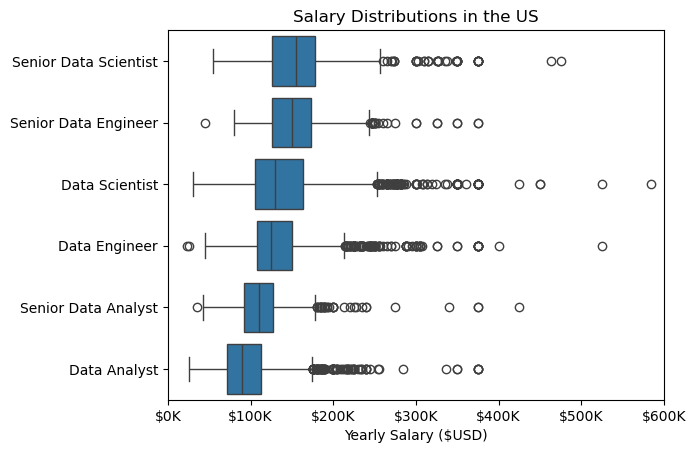

In [13]:
# Plotting the salary distributions for the top 6 data job titles in the US
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)

plt.title('Salary Distributions in the US')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')

# Formatting the x-axis to include $K
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()